<a href="https://colab.research.google.com/github/tylerphonglam/Project4-Homepriceprediction/blob/main/notebook_analysis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
df=pd.read_csv("HouseListings-Top45Cities-10292023-kaggle.csv",encoding='latin-1')

In [ ]:
df

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0
...,...,...,...,...,...,...,...,...,...,...
35763,Halifax,439900.0,301 60 Walter Havill Drive,2,2,Nova Scotia,431479,44.8857,63.1005,86753.0
35764,Halifax,6990000.0,1160 Rockcliffe Street,5,5,Nova Scotia,431479,44.8857,63.1005,86753.0
35765,Halifax,419900.0,212 60 Walter Havill Drive,2,2,Nova Scotia,431479,44.8857,63.1005,86753.0
35766,Halifax,949900.0,10 Idlewylde Road,3,1,Nova Scotia,431479,44.8857,63.1005,86753.0


In [ ]:
df["Province"].unique()

array(['Ontario', 'British Columbia', 'Alberta', 'Manitoba',
       'Saskatchewan', 'Newfoundland and Labrador', 'New Brunswick',
       'Quebec', 'Nova Scotia'], dtype=object)

In [ ]:
data=df[df["Province"]=='Ontario']

In [ ]:
data

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0
...,...,...,...,...,...,...,...,...,...,...
33675,Regina,399900.0,1777 FORGET ST,4,1,Ontario,226404,50.4547,-104.6067,90000.0
34585,Saskatoon,1099900.0,2556 MAYFAIR,3,3,Ontario,266141,52.1333,-106.6833,89000.0
34586,Saskatoon,1149900.0,2552 MAYFAIR,4,3,Ontario,266141,52.1333,-106.6833,89000.0
34587,Saskatoon,1099900.0,2548 MAYFAIR,4,3,Ontario,266141,52.1333,-106.6833,89000.0


In [ ]:
# 10 columns
# province - Ontanrio (real estate prediction)
# 9 columns
# not null
# 14105 entries/rows

In [ ]:
# data.to_csv("ontario.csv",index=False)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14015 entries, 0 to 34588
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  14015 non-null  object 
 1   Price                 14015 non-null  float64
 2   Address               14015 non-null  object 
 3   Number_Beds           14015 non-null  int64  
 4   Number_Baths          14015 non-null  int64  
 5   Province              14015 non-null  object 
 6   Population            14015 non-null  int64  
 7   Latitude              14015 non-null  float64
 8   Longitude             14015 non-null  float64
 9   Median_Family_Income  14015 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 1.2+ MB


In [ ]:
data.describe()

,Price,Number_Beds,Number_Baths,Population,Latitude,Longitude,Median_Family_Income
count,1.401500e+04,14015.000000,14015.000000,1.401500e+04,14015.000000,14015.000000,14015.000000
mean,9.556221e+05,3.476775,2.620335,8.528788e+05,43.800289,-79.764878,93573.813771
std,8.108259e+05,1.909135,1.394161,1.542558e+06,0.996928,2.133919,15141.134451
min,2.500000e+04,0.000000,0.000000,7.205100e+04,42.283300,-123.936400,73000.000000
25%,5.909500e+05,3.000000,2.000000,1.443560e+05,43.183300,-80.472800,82000.000000
50%,7.750000e+05,3.000000,2.000000,3.359490e+05,43.741700,-79.866700,92000.000000
75%,1.088000e+06,4.000000,3.000000,7.295600e+05,43.900000,-79.233300,98000.000000
max,3.700000e+07,109.000000,59.000000,5.647656e+06,52.133300,-75.695000,133000.000000


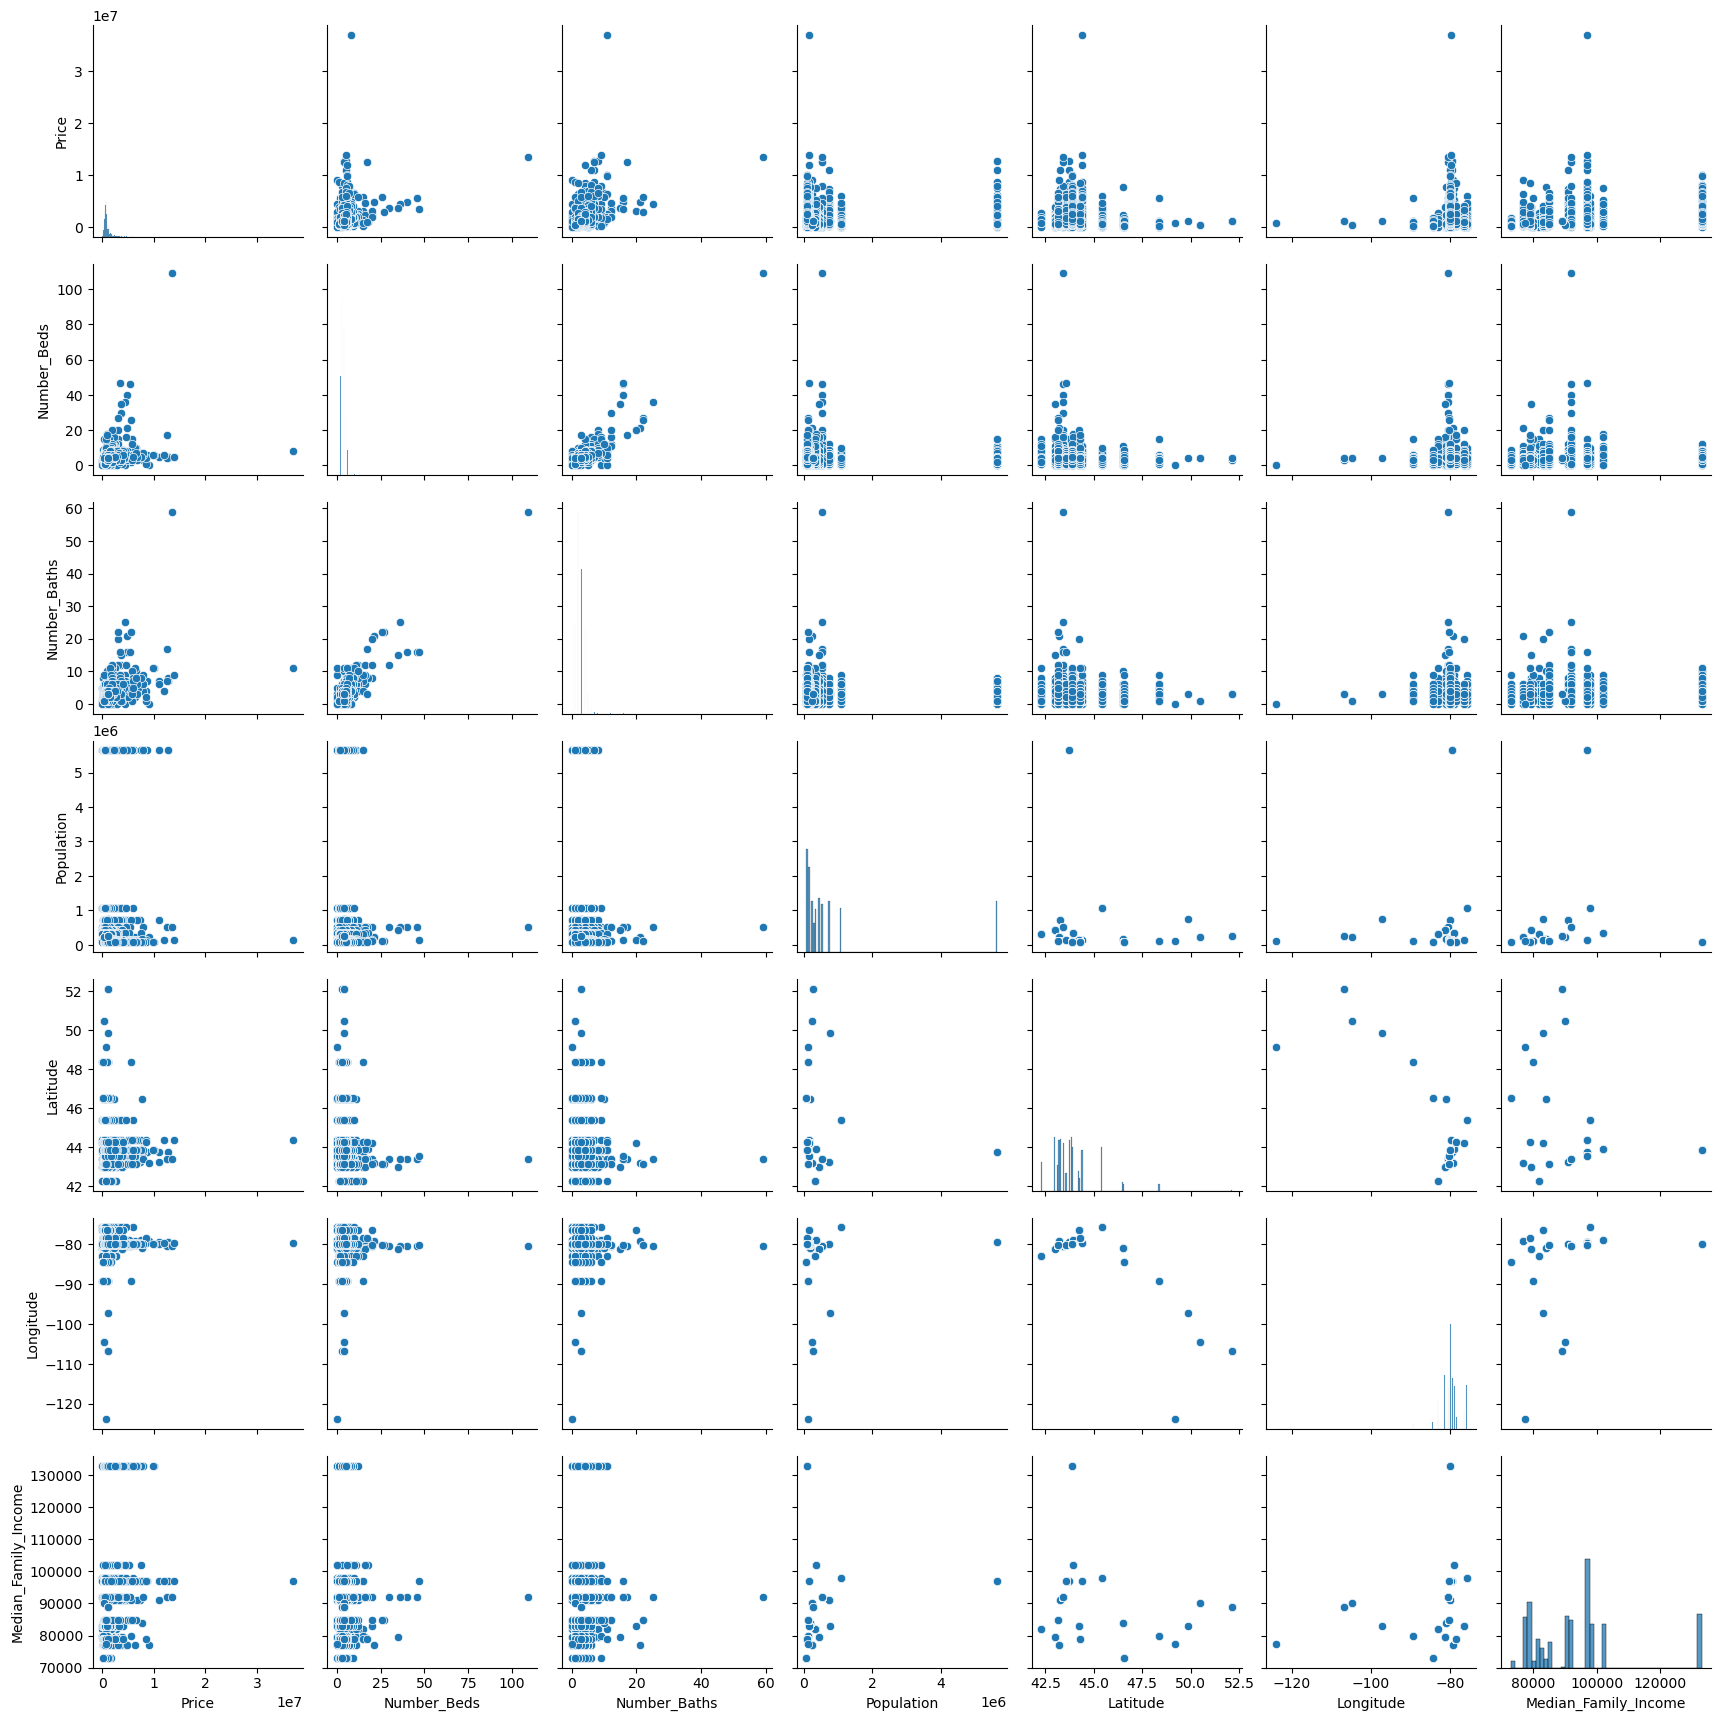

In [ ]:
sns.pairplot(data)
plt.show()

C:\Users\virtu\AppData\Local\Temp\ipykernel_7760\584179032.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'], color='green')


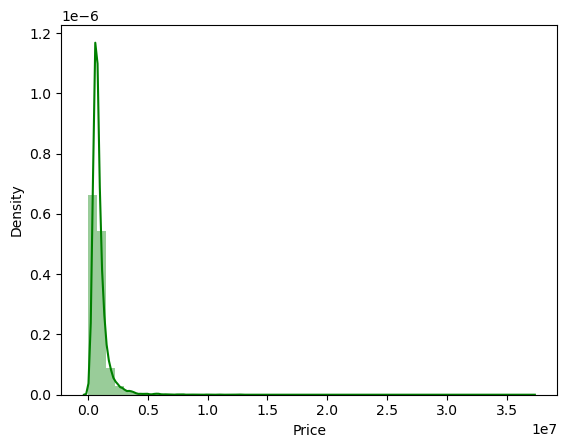

In [ ]:
sns.distplot(data['Price'], color='green')
plt.show()

In [ ]:
data

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0
...,...,...,...,...,...,...,...,...,...,...
33675,Regina,399900.0,1777 FORGET ST,4,1,Ontario,226404,50.4547,-104.6067,90000.0
34585,Saskatoon,1099900.0,2556 MAYFAIR,3,3,Ontario,266141,52.1333,-106.6833,89000.0
34586,Saskatoon,1149900.0,2552 MAYFAIR,4,3,Ontario,266141,52.1333,-106.6833,89000.0
34587,Saskatoon,1099900.0,2548 MAYFAIR,4,3,Ontario,266141,52.1333,-106.6833,89000.0


In [ ]:
# for every city there are some family
# toronto 200 families - range of income 1000 to 10000 median of their income

In [ ]:
len(data["Latitude"].unique()) # out of 14015 rows (21)

21

In [ ]:
len(data["Longitude"].unique()) # out of 14015 rows (20)

20

In [ ]:
# latitude longitude - position on our map
# different house it is useful
# repeating values
# lat long of only 20 house
# whole dataset

In [ ]:
len(data["Median_Family_Income"].unique()) # out of 14015 rows (18) understable

18

In [ ]:
data["Median_Family_Income"].unique()

array([ 97000.,  98000.,  83000.,  91000.,  92000.,  79500.,  77000.,
       102000.,  82000.,  89000.,  90000.,  84000.,  85000.,  80000.,
        79000.,  77500.,  73000., 133000.])

In [ ]:
len(data["Price"].unique())

2389

In [ ]:
len(data["City"].unique())

21

In [ ]:
len(data["Address"].unique())

13747

In [ ]:
data["City"].unique()

array(['Toronto', 'Ottawa', 'Winnipeg', 'Hamilton', 'Kitchener', 'London',
       'St. Catharines', 'Oshawa', 'Windsor', 'Saskatoon', 'Regina',
       'Barrie', 'Sudbury', 'Kingston', 'Guelph', 'Brantford',
       'Thunder Bay', 'Peterborough', 'Nanaimo', 'Sault Ste. Marie',
       'Caledon'], dtype=object)

In [ ]:
data.Address.value_counts().head(25)

450 Dundas Street E           5
140 CENTRAL Avenue            4
15 GORDON Avenue              4
17 BOWES Avenue               3
851 QUEENSTON Road            3
720 Grey Street               3
600 NORTH SERVICE Road        3
399 ELIZABETH Street          3
36 JAMES Street S             3
600 North Service Road        3
895 MAPLE Avenue              3
305 GARNER Road W             3
2850 VICTORIA Street N        2
56 SCOTS PINE Trail           2
65 LEINSTER Avenue S          2
36 BALMORAL Drive             2
202 WHARNCLIFFE Road S        2
#26 -2335 SHEPPARD AVE W      2
101 SHOREVIEW Place           2
347 TOWNSEND Drive            2
182 PELHAM Road               2
265 & 267 SPRINGBANK Drive    2
387 & 389 GLENDALE Avenue     2
71 BRISCOE Street E           2
#115 -320 DIXON RD            2
Name: Address, dtype: int64

In [ ]:
# fetures
# city - median family income
# number of beds
# number of baths
#
# y - predict price

In [ ]:
# we need to some features
# more data in our dataset
#

In [ ]:
df

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0
...,...,...,...,...,...,...,...,...,...,...
35763,Halifax,439900.0,301 60 Walter Havill Drive,2,2,Nova Scotia,431479,44.8857,63.1005,86753.0
35764,Halifax,6990000.0,1160 Rockcliffe Street,5,5,Nova Scotia,431479,44.8857,63.1005,86753.0
35765,Halifax,419900.0,212 60 Walter Havill Drive,2,2,Nova Scotia,431479,44.8857,63.1005,86753.0
35766,Halifax,949900.0,10 Idlewylde Road,3,1,Nova Scotia,431479,44.8857,63.1005,86753.0


In [ ]:
tor = df[df["City"]=="Toronto"]

In [ ]:
tor # 1276

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0
...,...,...,...,...,...,...,...,...,...,...
1271,Toronto,598000.0,#107 -99 THE DONWAY W,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
1272,Toronto,2199000.0,119 CASTLEFIELD AVE,4,4,Ontario,5647656,43.7417,-79.3733,97000.0
1273,Toronto,829000.0,#524 -40 SYLVAN VALLEYWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
1274,Toronto,2300000.0,133 COWAN AVE,4,4,Ontario,5647656,43.7417,-79.3733,97000.0


In [ ]:
# poor middle rich # differet income

In [ ]:
tor["Median_Family_Income"].unique()

array([97000.])

In [ ]:
# 97k

In [ ]:
tor.Price.value_counts().head(25)

899000.0     21
599000.0     19
1099000.0    17
799000.0     17
699000.0     15
749900.0     13
999000.0     12
649000.0     11
599900.0     11
499000.0     10
899900.0     10
929000.0     10
1399000.0    10
749000.0     10
799900.0      9
1499000.0     9
499999.0      8
1799000.0     8
650000.0      8
699900.0      8
949000.0      8
1649000.0     7
1299000.0     7
1699000.0     7
1250000.0     7
Name: Price, dtype: int64

In [ ]:
len(df["Latitude"].unique())

45

In [ ]:
len(df["Longitude"].unique())

44

In [ ]:
len(df["Median_Family_Income"].unique())

32

In [ ]:
len(df["City"].unique())

45

In [1]:
# in this dataset only two features numbers of beds and baths are usefull
# The rest features like latitude, longitude, family income and price has a lot of repeating values/same values these are the 2 main reason that I think we should change the dataset.